# Thompson Sampling

Thompson Sampling is a powerful algorithm used to solve the **multi-armed bandit problem**, a classic dilemma in machine learning that balances the trade-off between **exploration** (trying out different options to gather information) and **exploitation** (leveraging known information to maximize rewards).

**Multi-Armed Bandit Problem:**

Imagine you’re faced with several slot machines (also known as "bandits"), each with its own unknown probability distribution of payouts. Your goal is to maximize your total reward over time by deciding which machines to play. However, since you don’t initially know which machine is the best, you need to experiment (exploration) while also trying to earn as much as possible based on what you’ve learned (exploitation).

**Real-World Application: Online Advertising**

A practical example of the multi-armed bandit problem is **ad selection** on a website. Each ad can be considered a different "arm" of the bandit. When a user visits the webpage, the algorithm selects which ad to display:
- **Reward:** Click or no click (binary reward: 1 for a click, 0 for no click).
- **Objective:** Maximize the total number of clicks over many user visits.


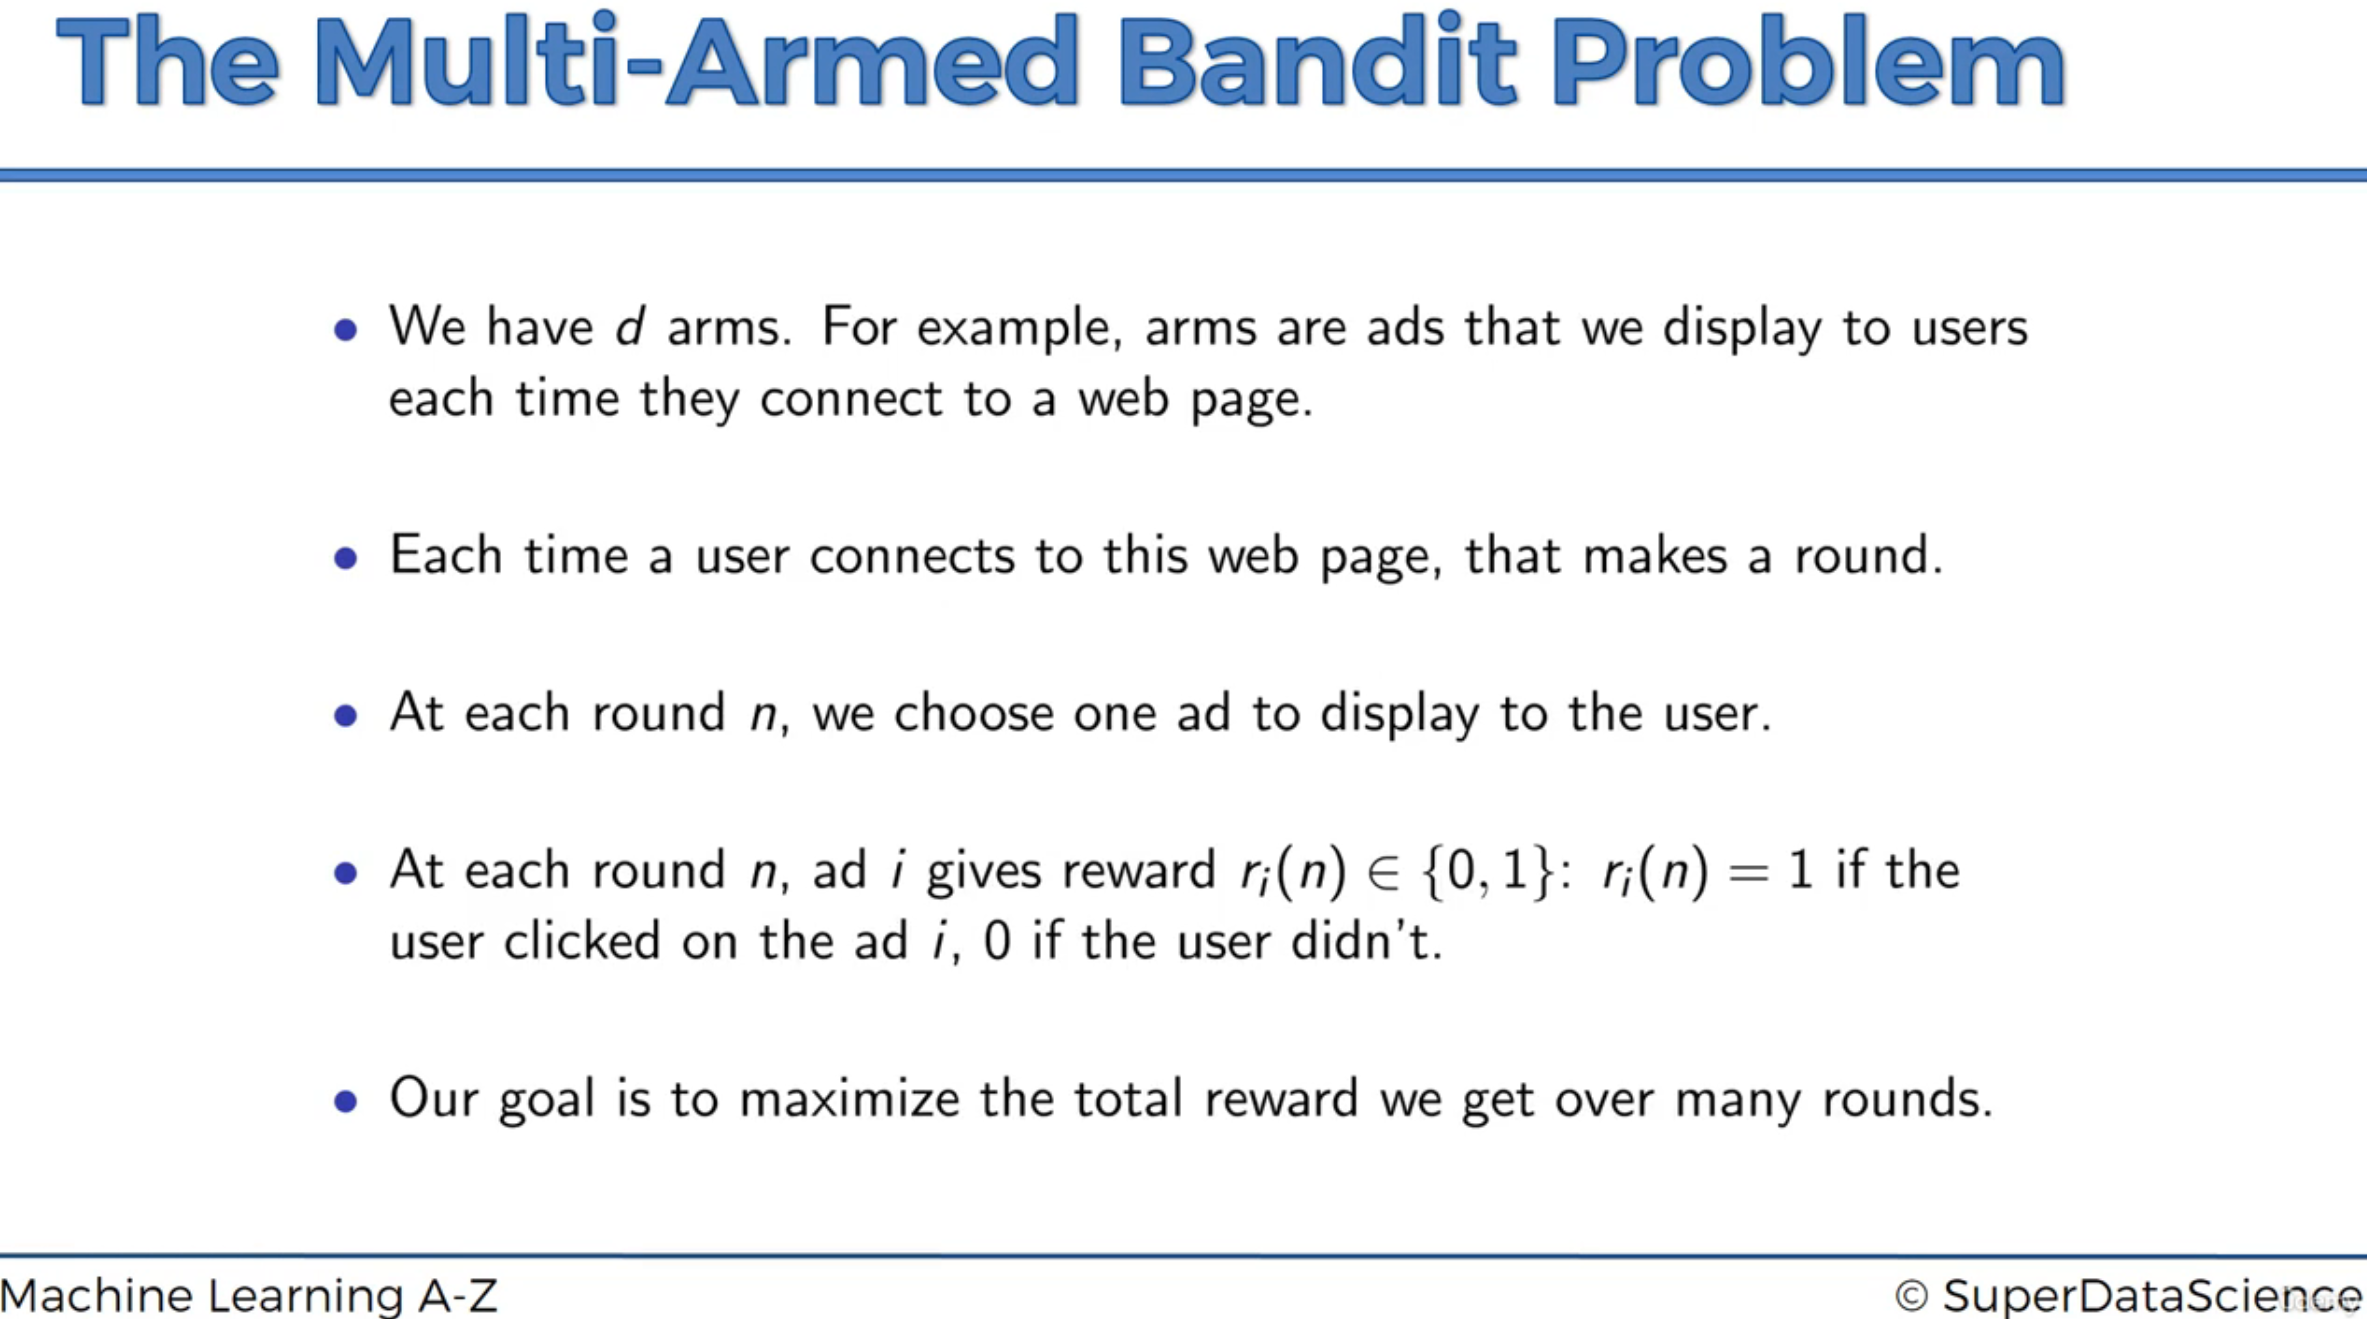


## Thompson Sampling

Thompson Sampling is a **probabilistic algorithm** designed to solve the multi-armed bandit problem by maintaining and updating a probability distribution for each arm's potential reward. Unlike deterministic algorithms like the **Upper Confidence Bound (UCB)**, which strictly choose the arm with the highest estimated value, Thompson Sampling introduces randomness into the selection process, enhancing the balance between exploration and exploitation.

**Key Concepts:**

1. **Distributions for Each Arm:**
   - For each ad (or bandit), Thompson Sampling maintains a **probability distribution** representing our belief about its true expected reward.
   - These distributions are not attempts to guess the actual payout distributions of the machines but are auxiliary mechanisms to model our uncertainty about each arm’s performance.

2. **Bayesian Inference:**
   - Thompson Sampling leverages Bayesian inference to update these distributions based on observed rewards.
   - Initially, with no prior knowledge, each arm's distribution is broad, indicating high uncertainty.
   - As rewards are observed, the distributions become more refined, reflecting increased confidence in each arm’s expected reward.

Slide about Bayesian Inference, only for reference:

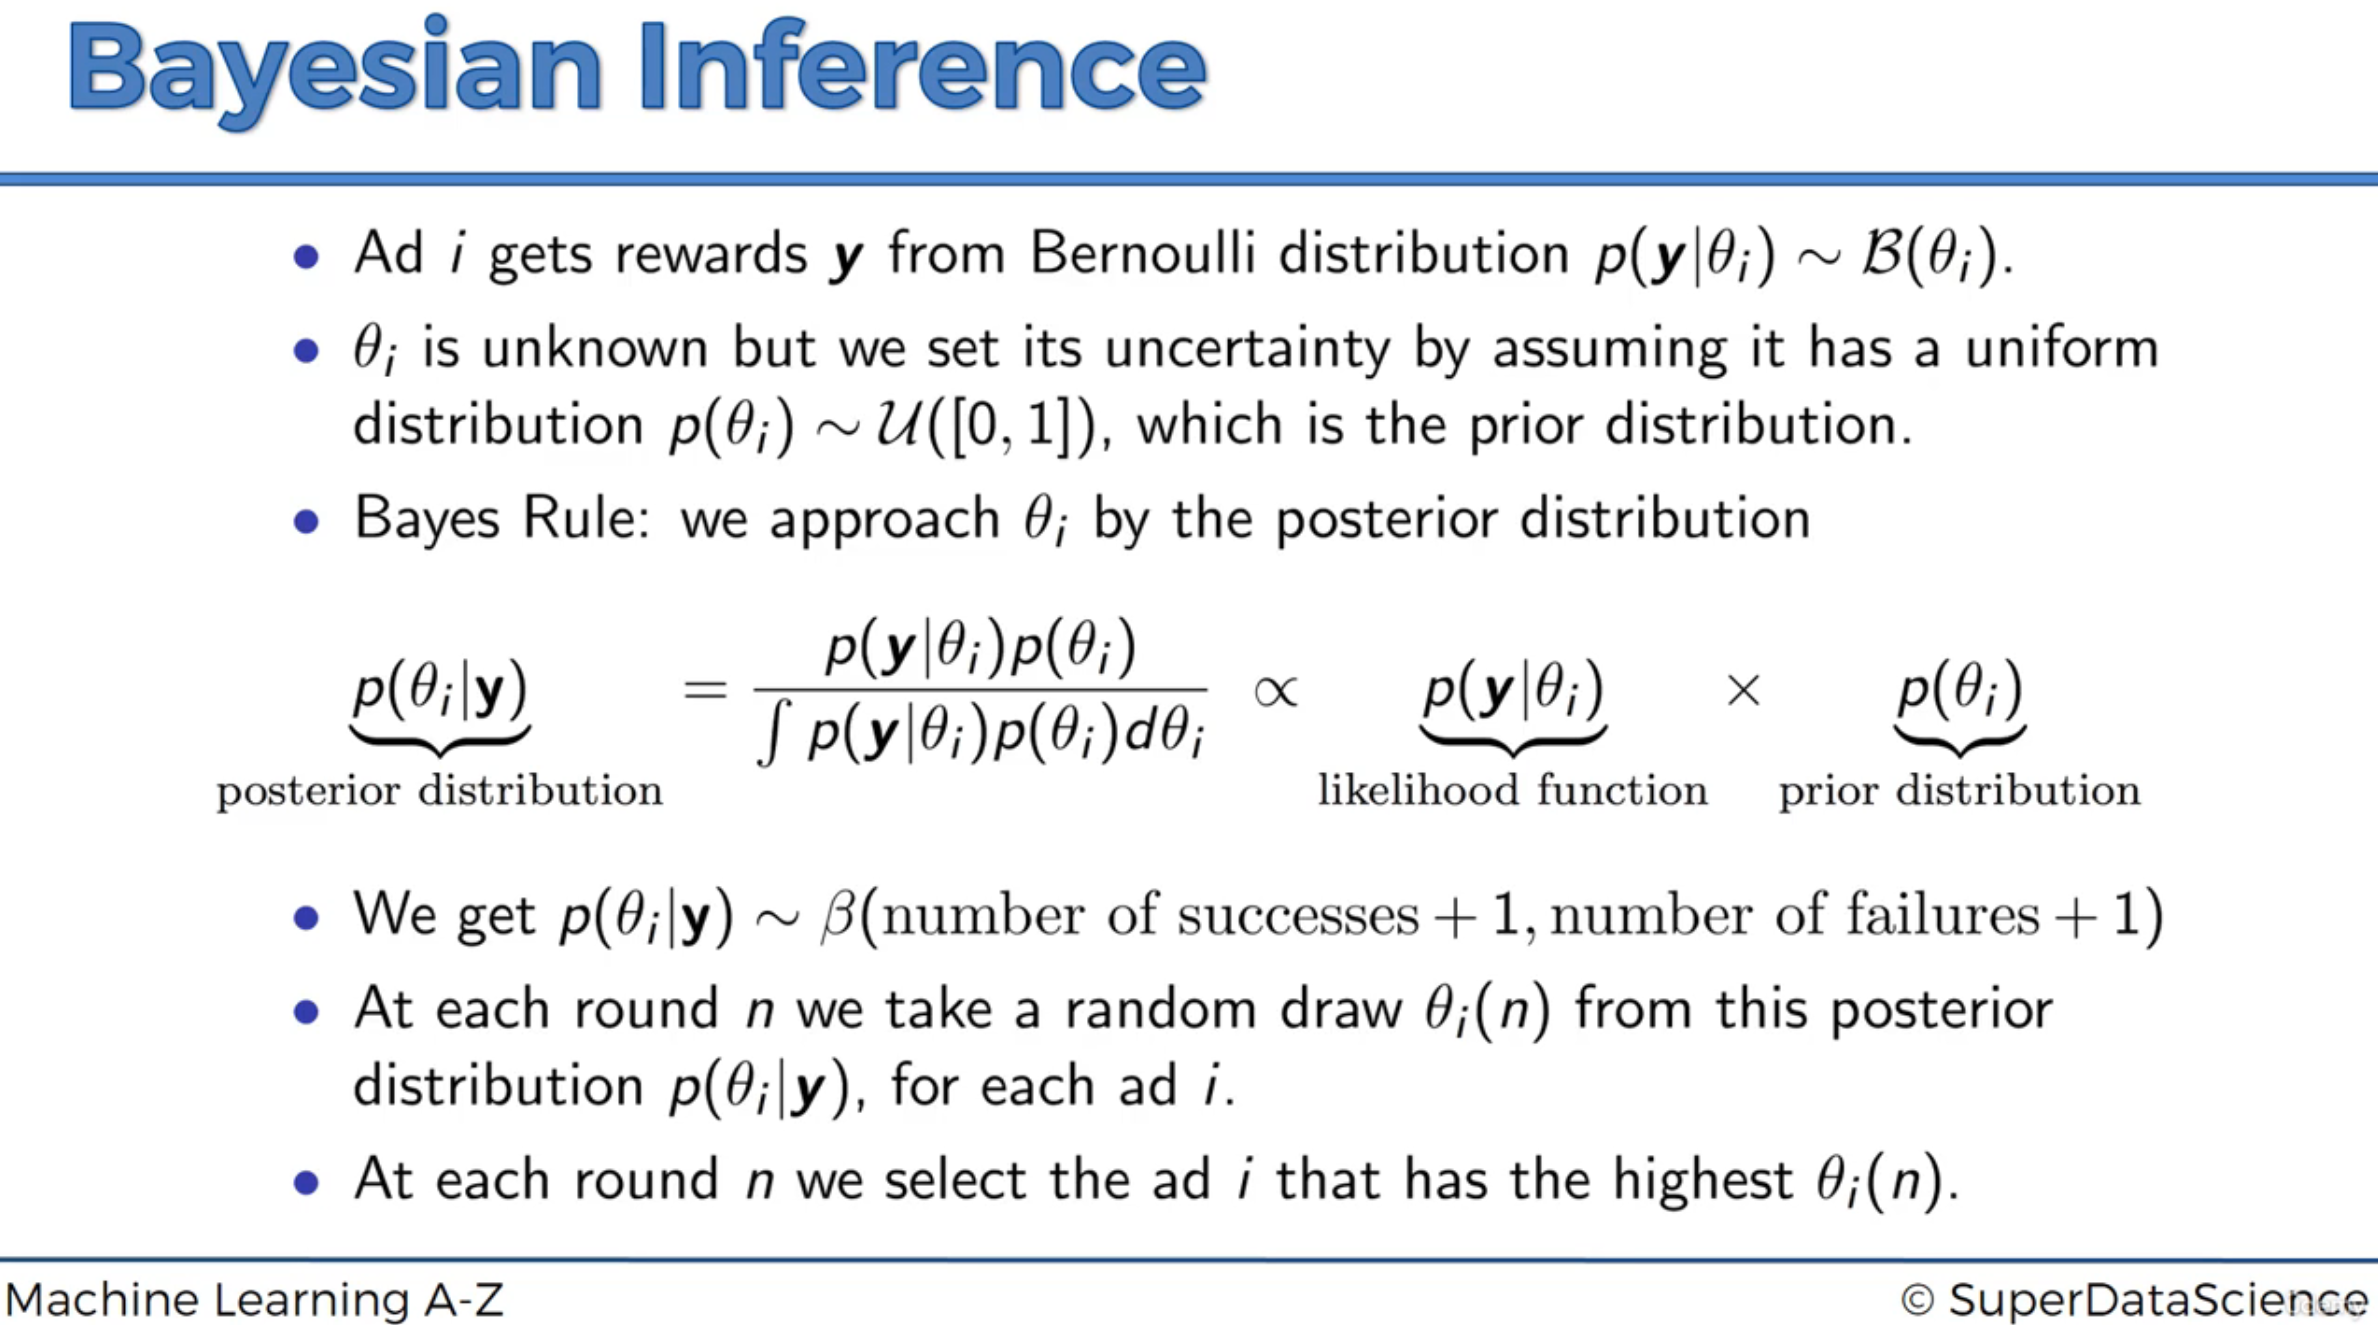

## How Thompson Sampling Works

Let's walk through the algorithm step-by-step using a simplified scenario with three bandits (blue, green, and yellow):

**Step 1: Initialize Distributions**

- **Initial State:** No prior knowledge about which bandit is best. Assign broad distributions to each:
  - Blue, Green, and Yellow bandits each have their own distribution (e.g., Beta distributions in binary reward scenarios).
  - Note that we are assigning **distributions** and not a specific value or a specific line.
- In the image below, the vertical lines represent where the μ of each machine actually is. The distributions are estimations, do not correspond to the real μ.

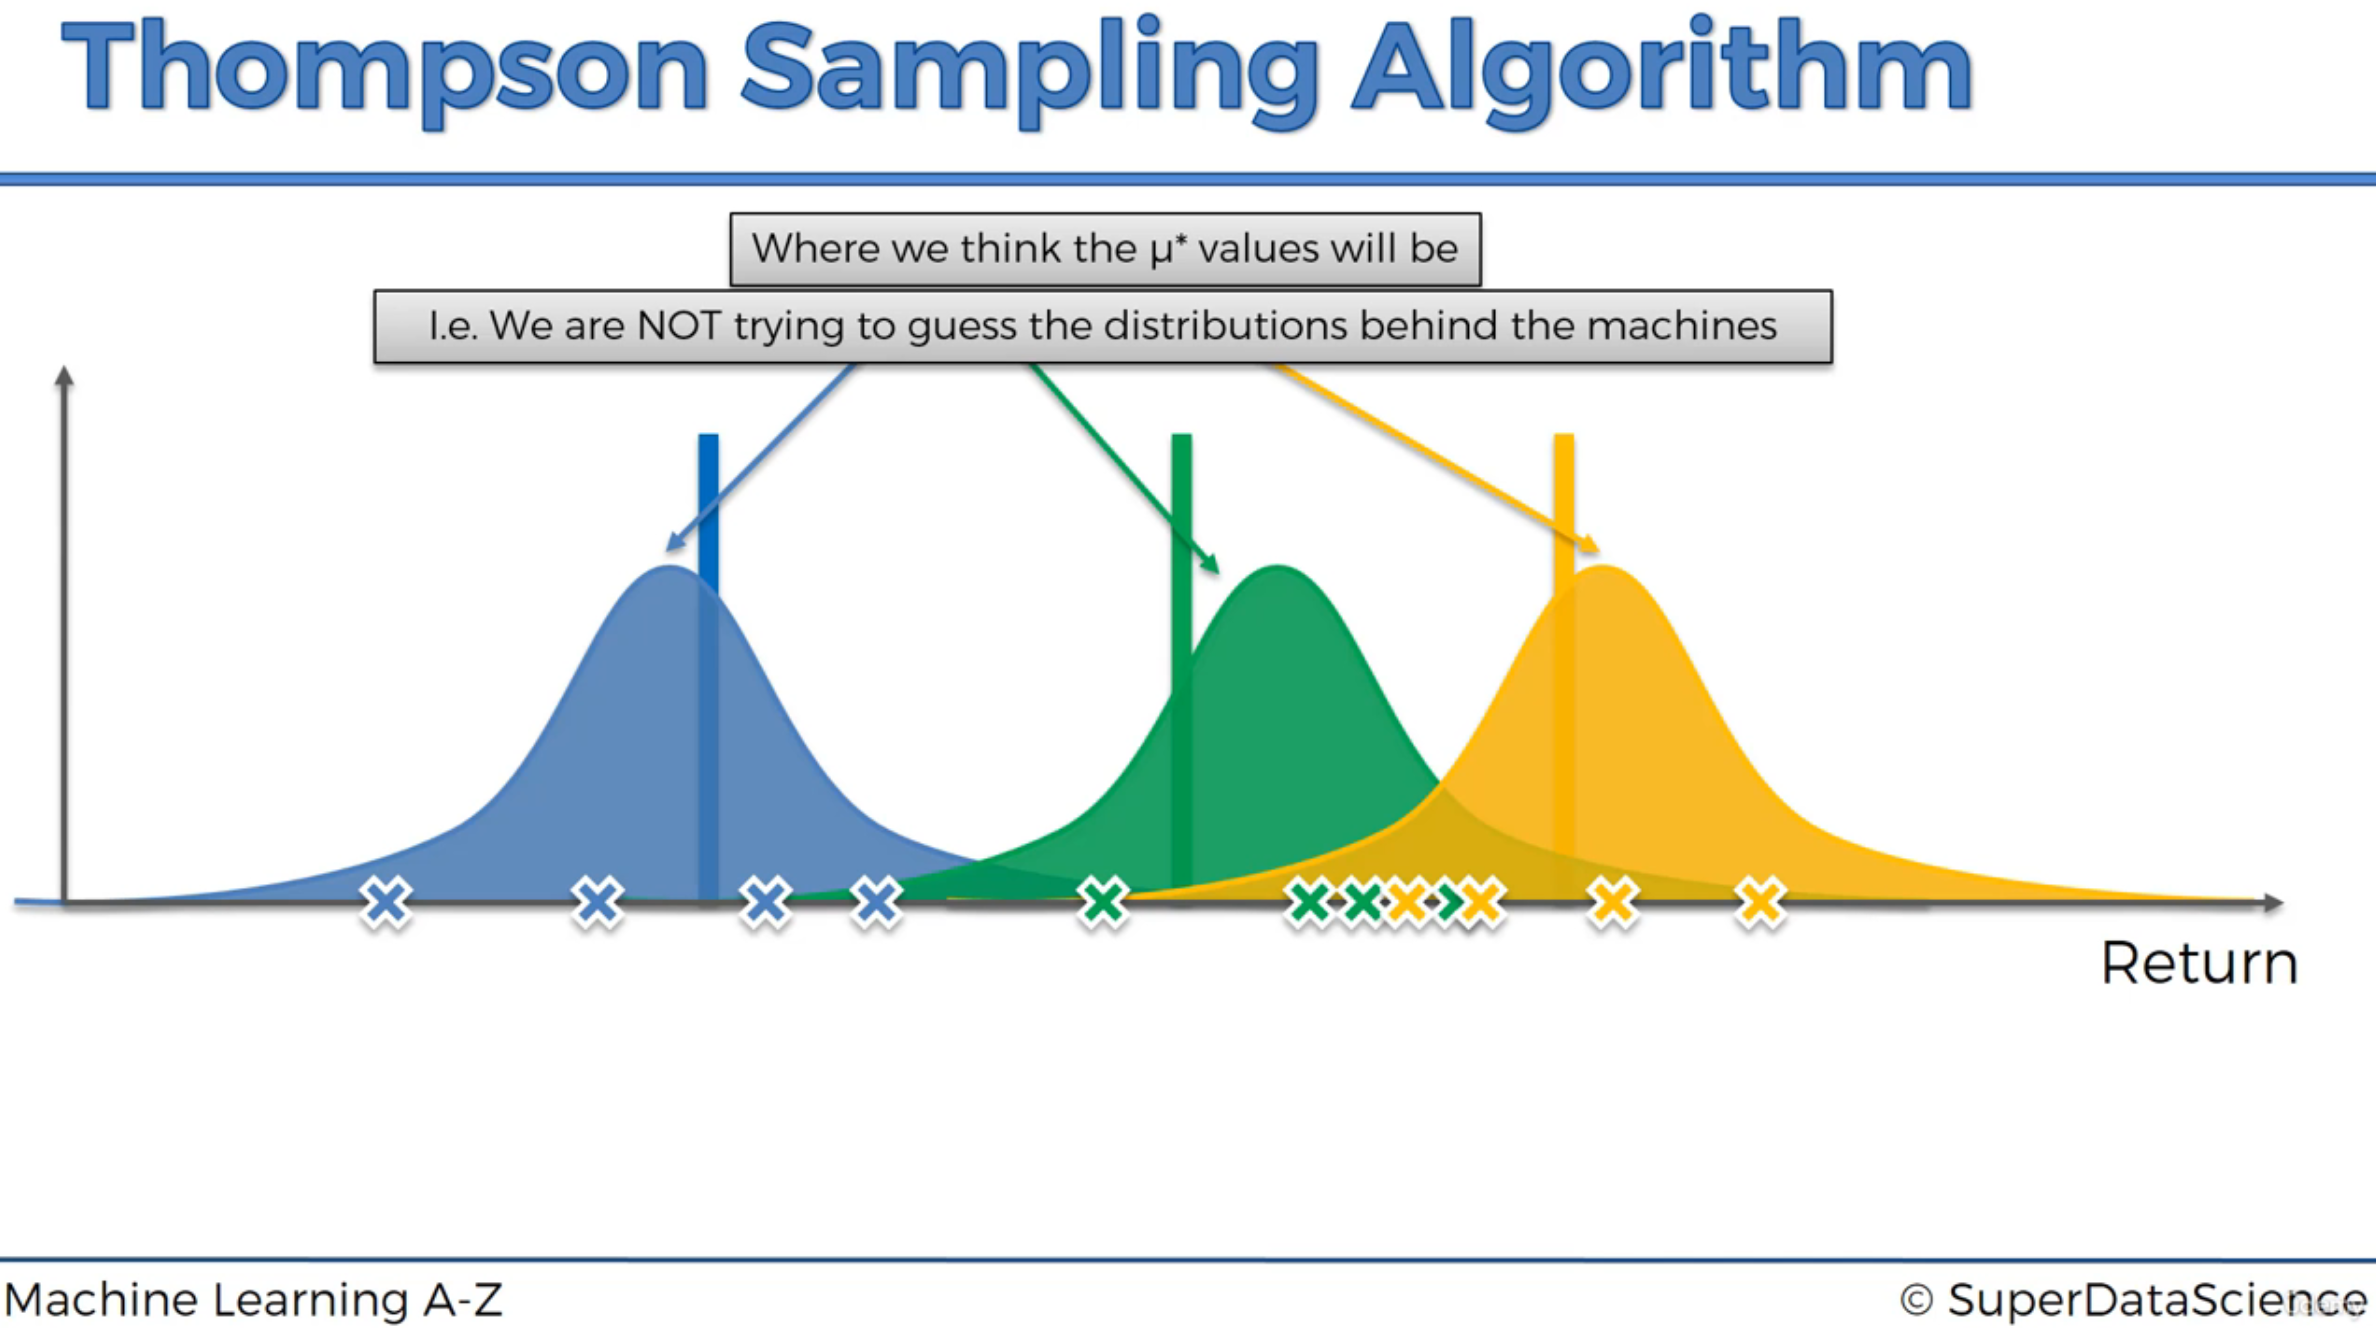

**Step 2: Sampling from Distributions**

- **New Round:** For each bandit, randomly draw a sample value from its respective distribution.
  - These samples represent hypothetical expected returns based on current beliefs (based on the **distribution**).
  - See 'X' in the image below.

**Step 3: Select the Bandit with the Highest Sampled Value**

- **Choose Bandit:** Identify which bandit has the highest sampled value and select it to pull its lever (i.e., display the corresponding ad).
- In the case of the image below, we select green.

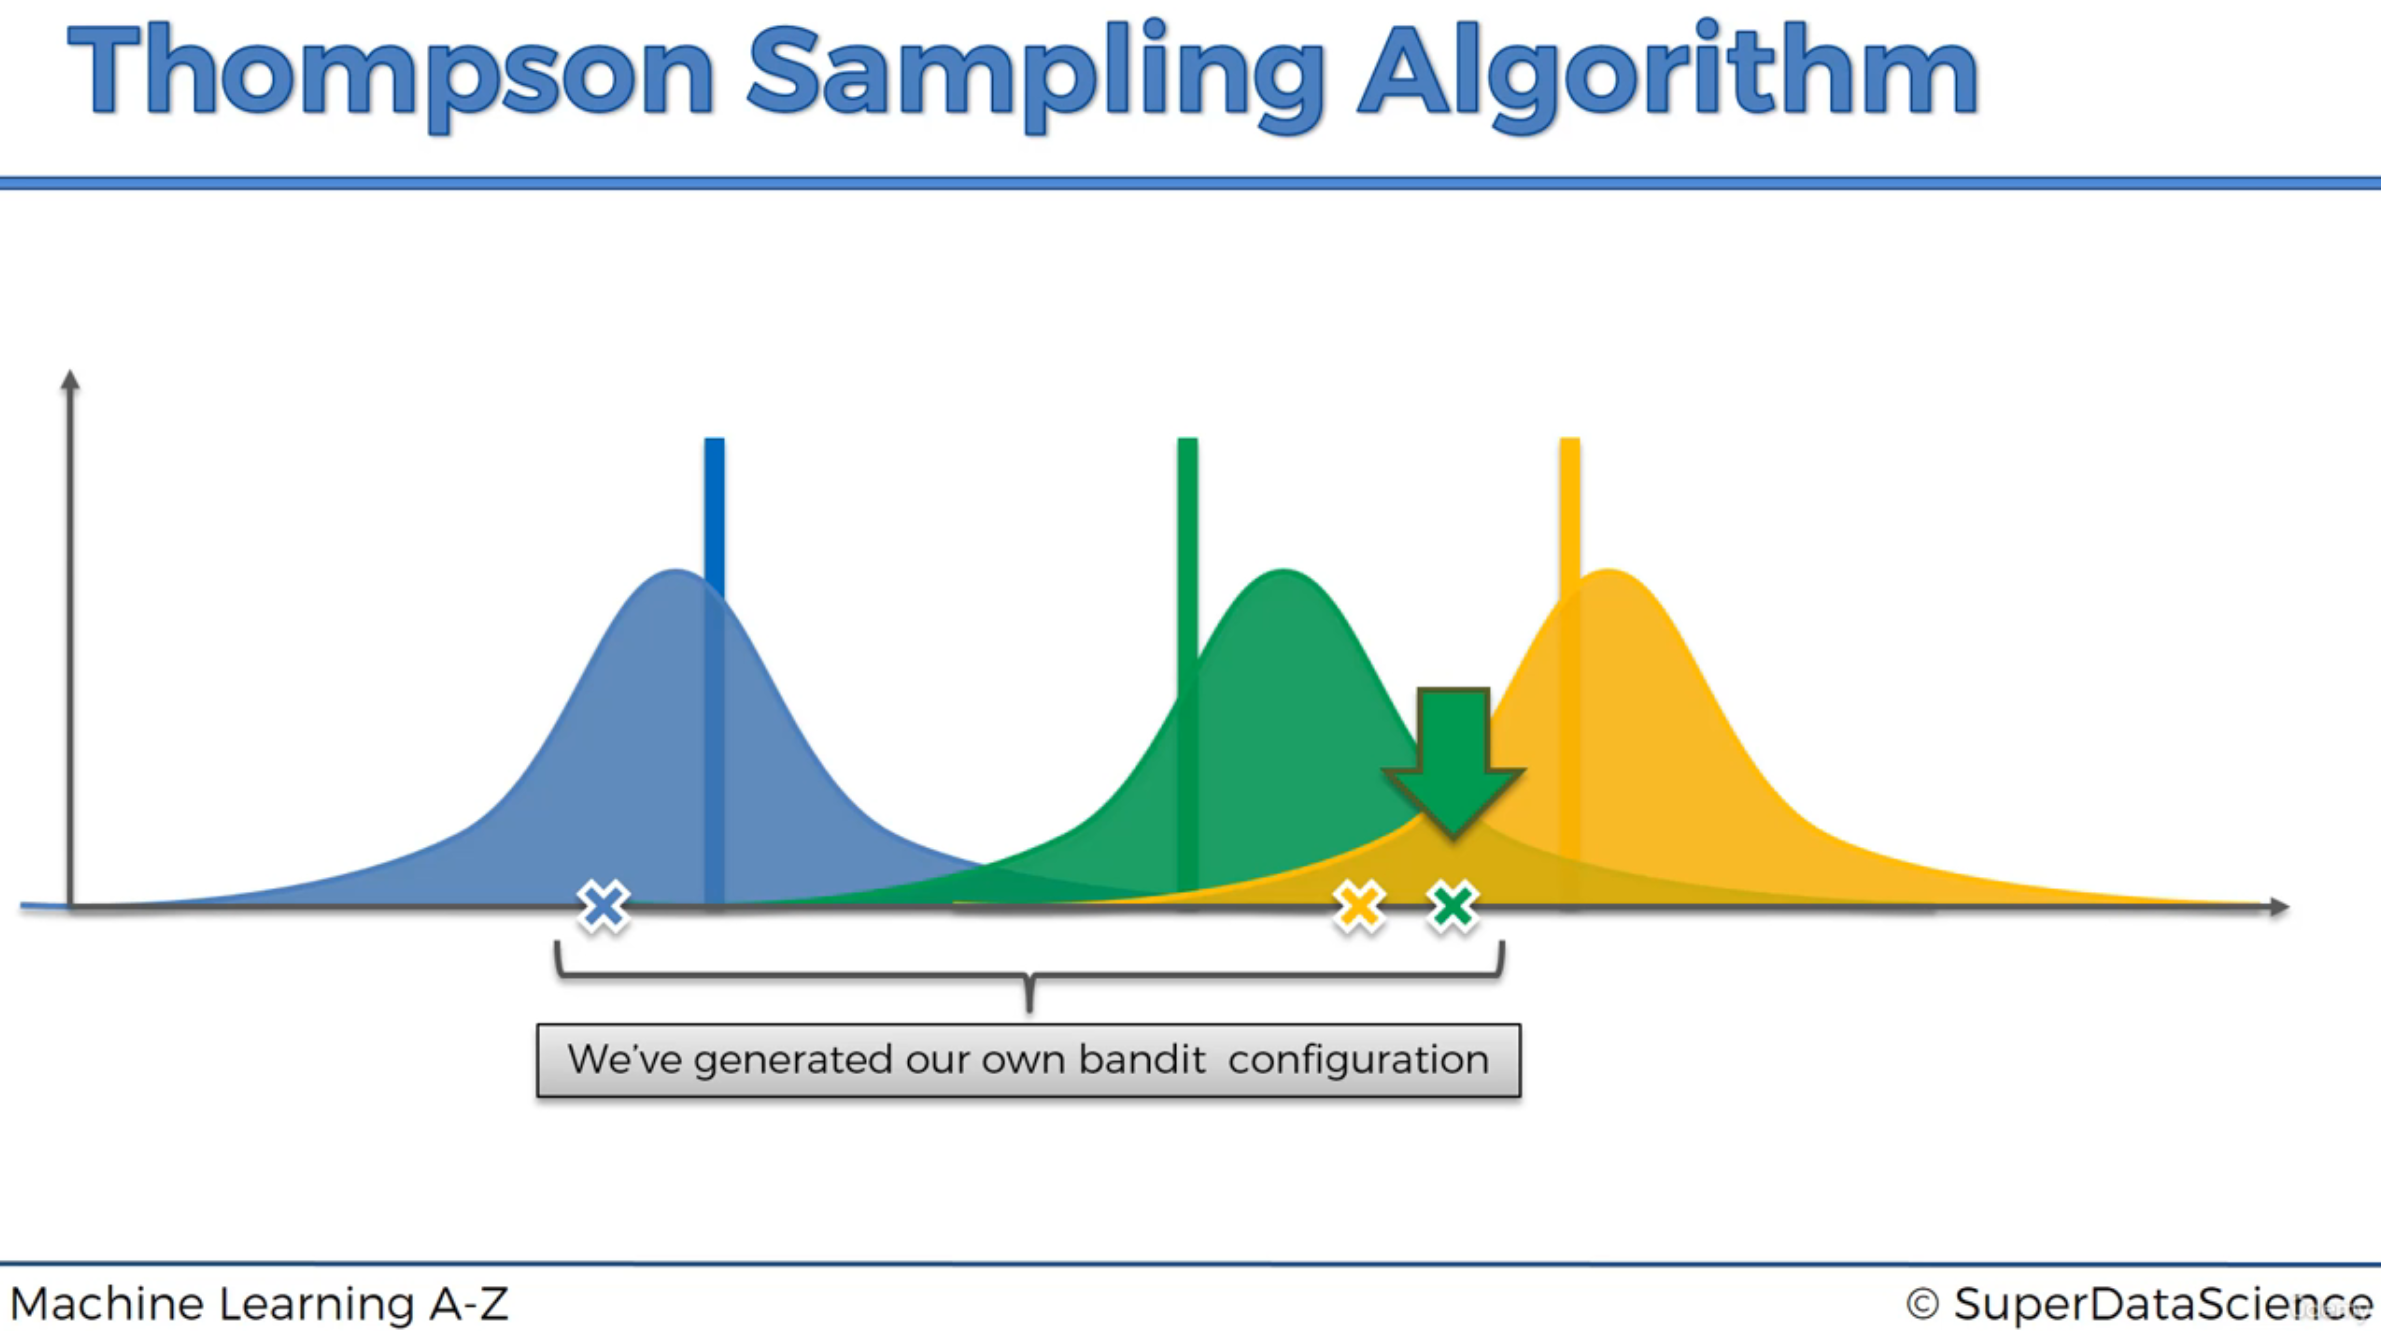


**Step 4: Observe Reward and Update Distributions**

- **Receive Reward:** After pulling the lever, observe the reward (e.g., whether the ad was clicked).
- **Update Belief:** Use Bayesian updating to adjust the chosen bandit’s distribution based on the received reward:
  - **Success (e.g., click):** Increase the probability that this bandit is good.
  - **Failure (e.g., no click):** Decrease the probability accordingly.
- **Refinement:** Over time, as more data is collected, the distributions become narrower and more accurate, especially for the best-performing bandit.


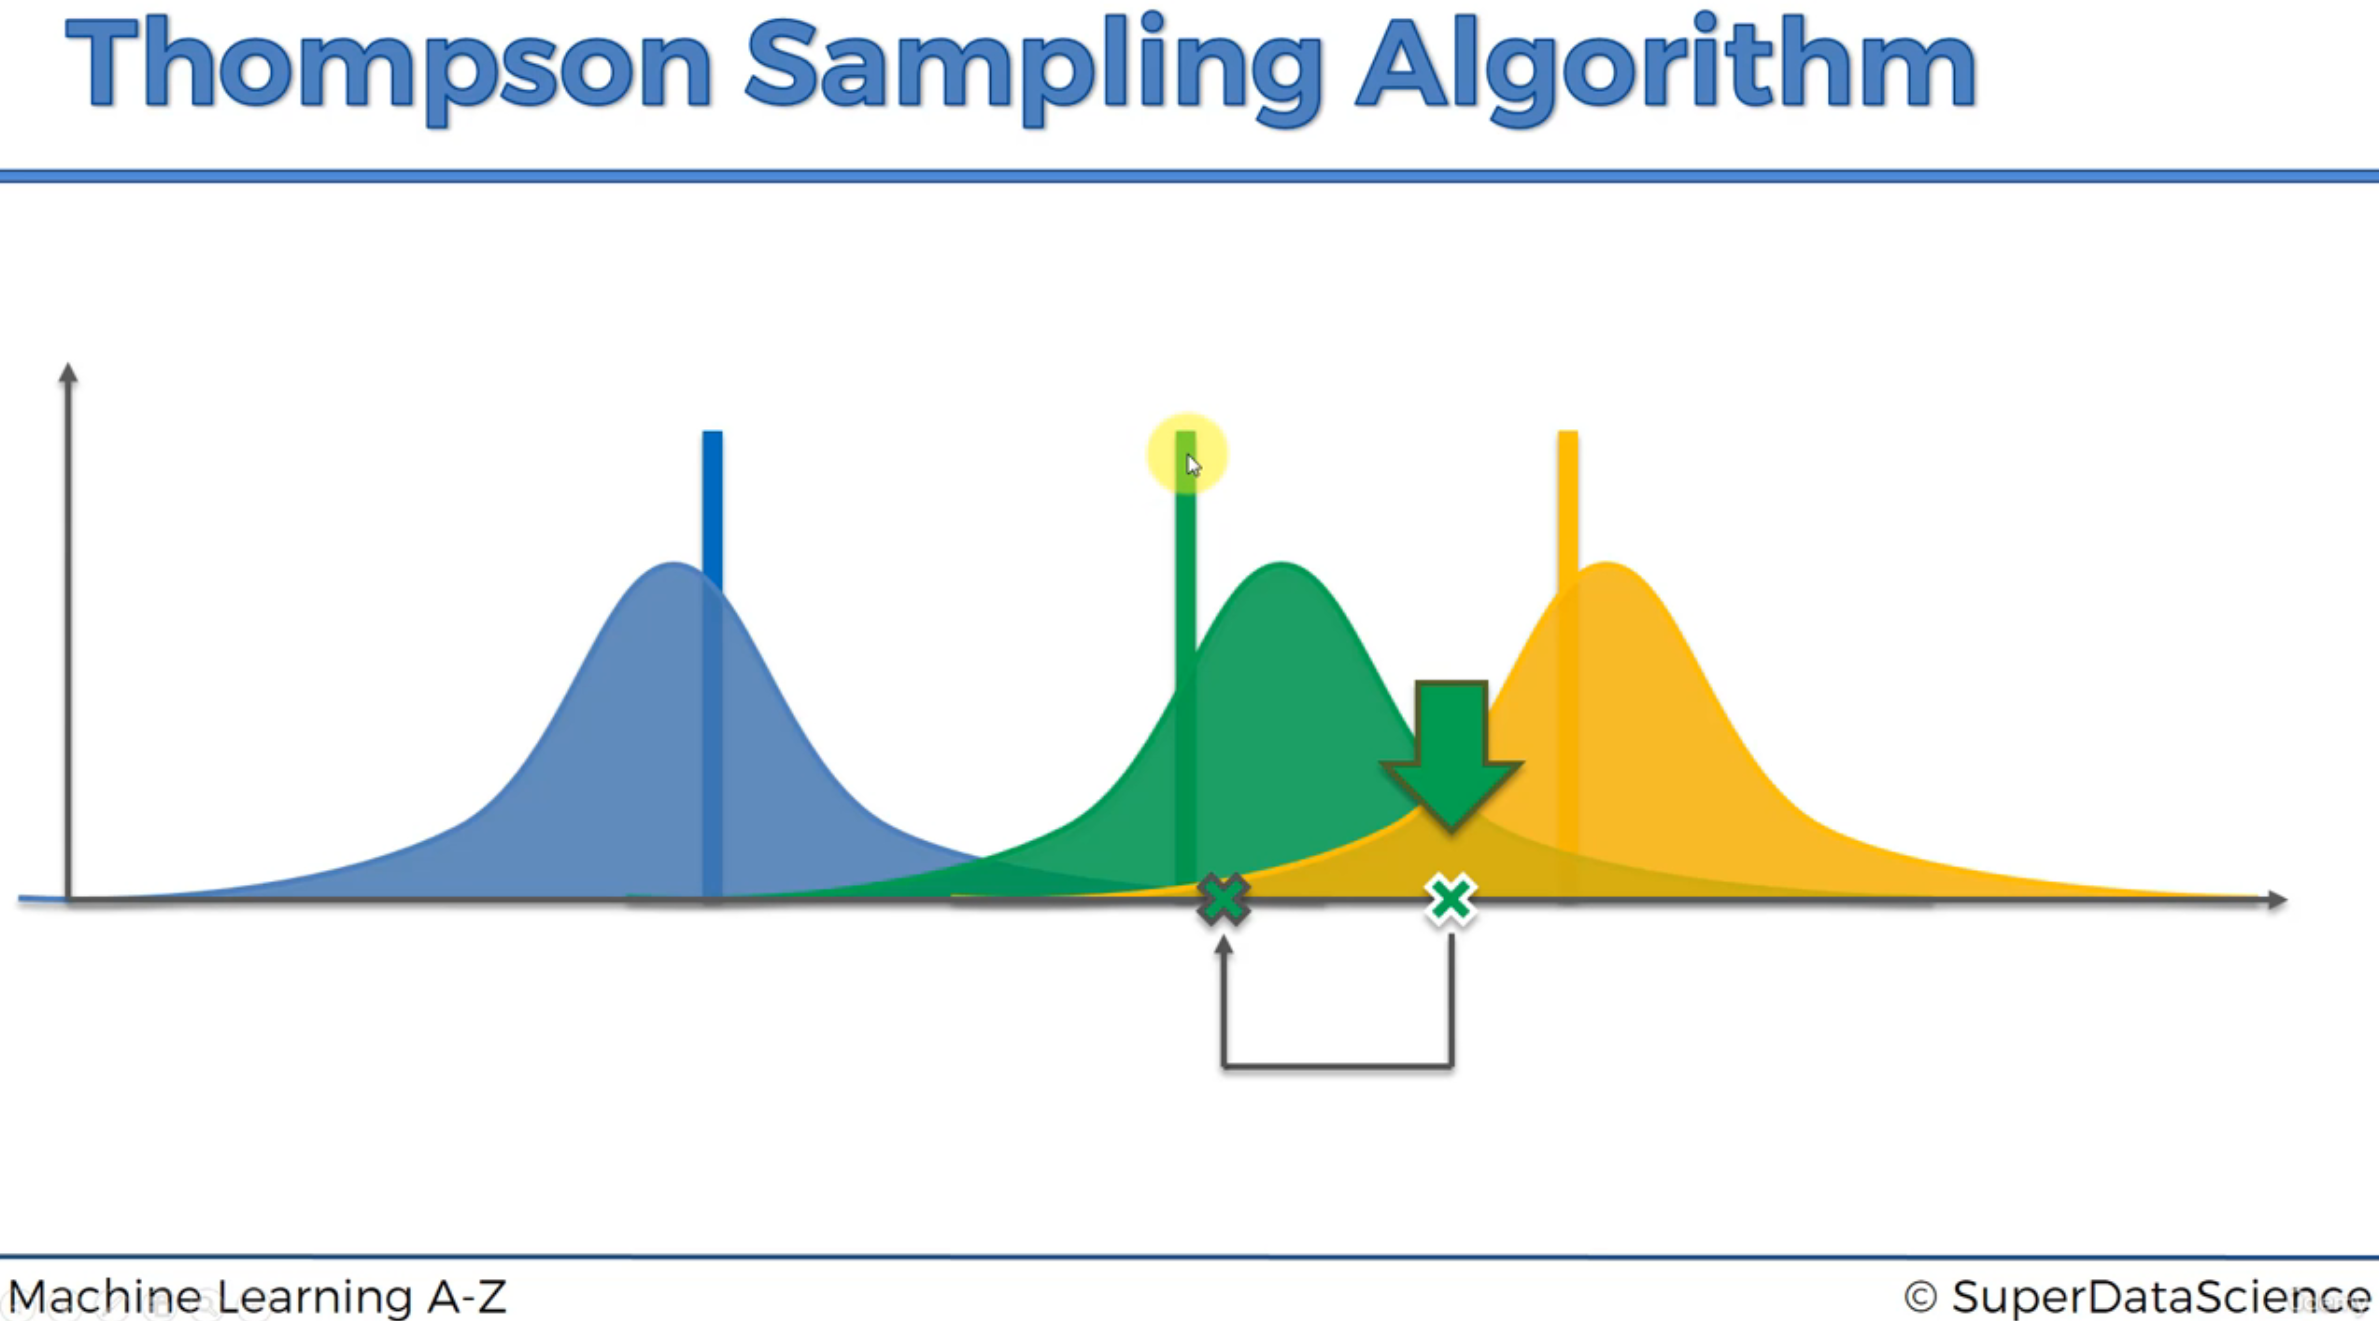


**Step 5: Repeat**

- **Next Round:** Repeat the sampling, selection, and updating process.
- **Convergence:** Gradually, the algorithm favors the bandit with the highest true expected reward, minimizing exploration of less promising options.

How convergence looks:

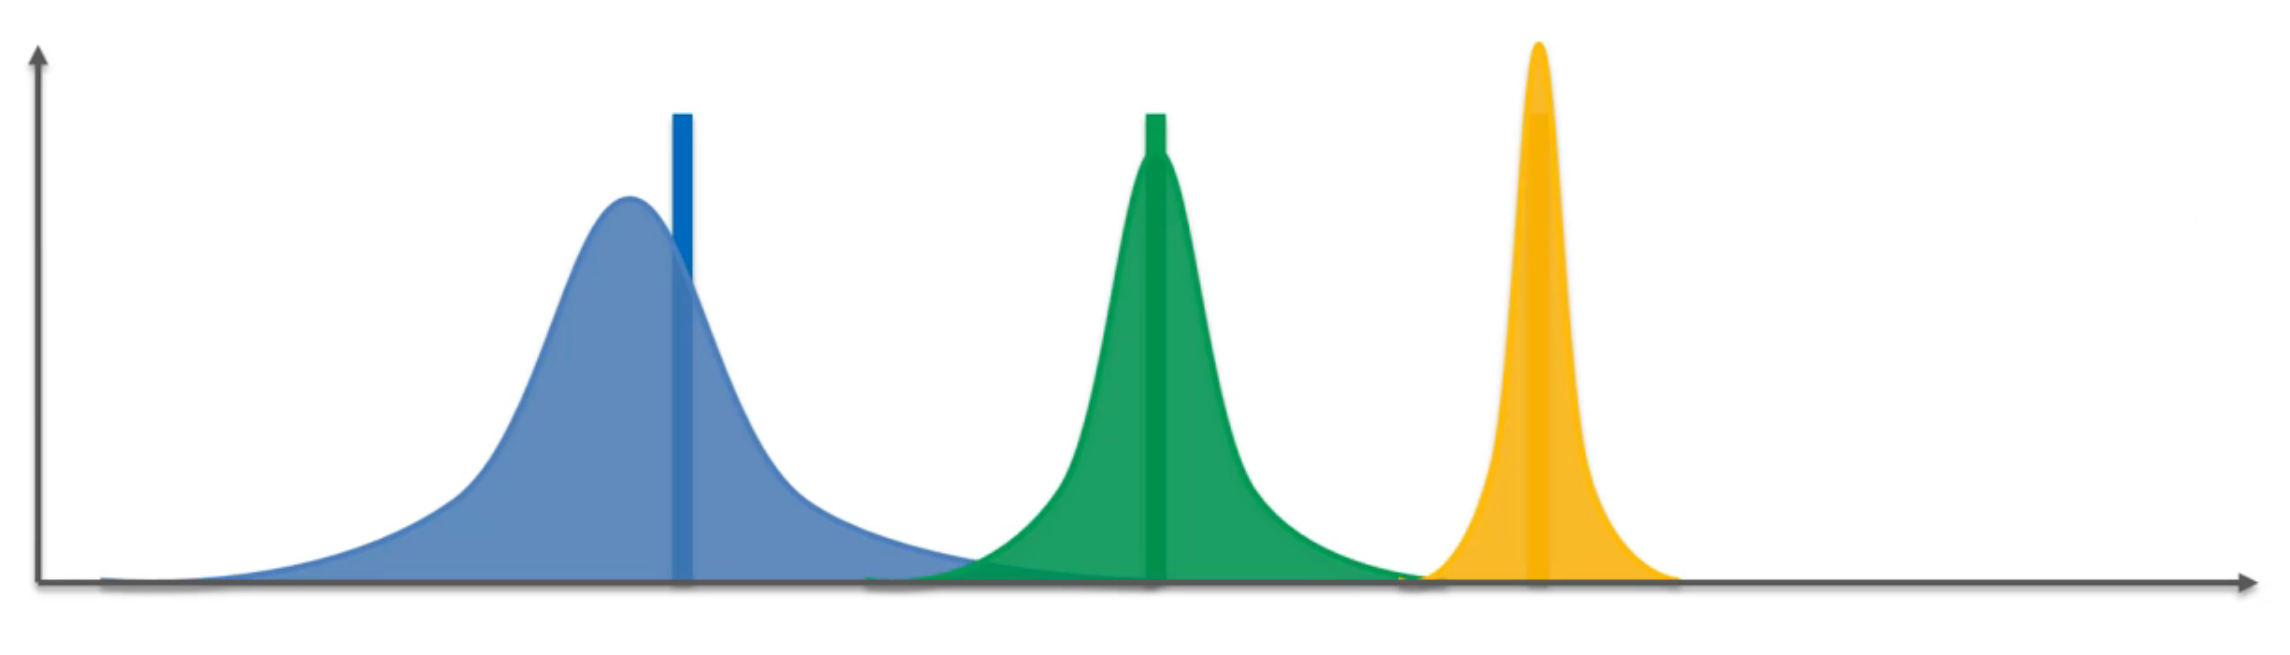

Here is a summary of the algorithm:

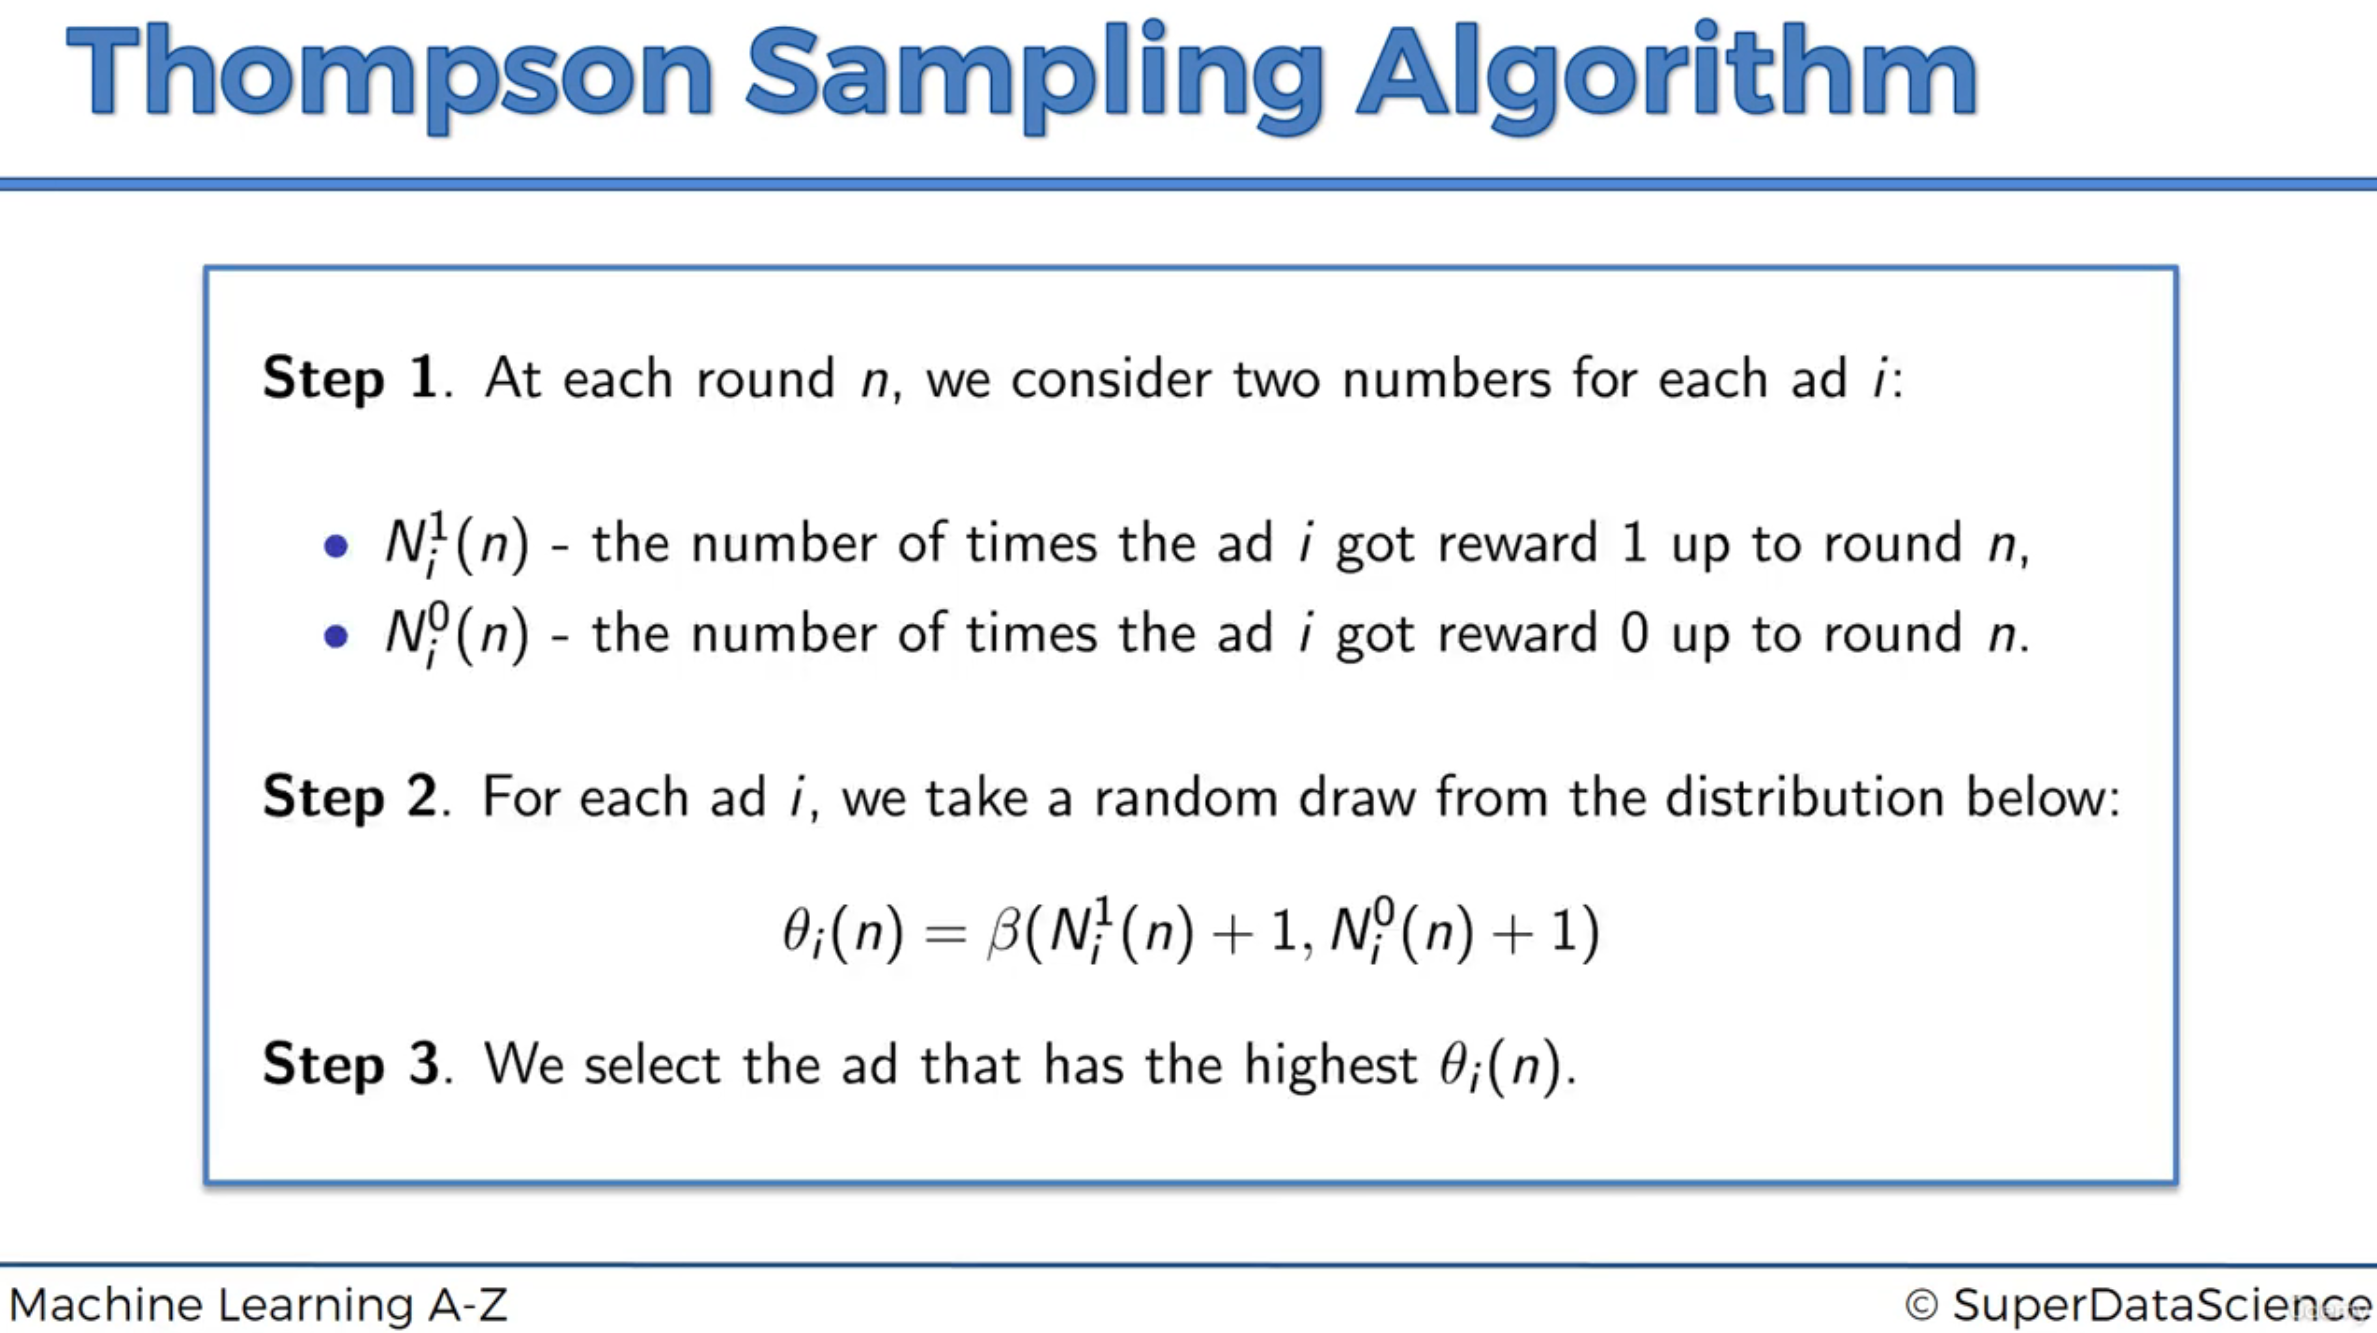

## Advantages of Thompson Sampling

- **Balanced Exploration and Exploitation:** The probabilistic nature ensures that even less-explored bandits have a chance of being selected, preventing the algorithm from getting stuck on a suboptimal choice.
- **Adaptability:** Quickly adjusts to changes in the environment, making it suitable for dynamic settings like online advertising where user behavior may evolve.
- **Efficiency:** Often achieves higher cumulative rewards compared to other algorithms like UCB, especially in scenarios with clear distinctions between bandits.

Thompson Sampling elegantly navigates the exploration-exploitation trade-off in the multi-armed bandit problem by maintaining and updating probability distributions for each option's potential reward. By sampling from these distributions to make decisions, it ensures a balanced approach that leverages both existing knowledge and the need to gather more information. This makes Thompson Sampling a robust and effective choice for applications ranging from online advertising to clinical trials and beyond.


## UCB vs. Thompson Sampling

1. Algorithm Nature: Deterministic vs Probabilistic
  - **UCB:** **Deterministic**, always selects the arm with the highest calculated confidence bound.
    - **Consistent Choices:** Given the same data, it makes the same selection every time.

  - **Thompson Sampling**: **Probabilistic:**, samples from probability distributions to choose an arm.
    - **Randomized Selection:** Can select different arms even with identical data, promoting exploration.

2. Exploration vs. Exploitation
  - **UCB**
    - **Systematic Balance:** Uses confidence bounds to balance exploring less-known arms and exploiting the best-known arm.
    - **Immediate Updates Required:** Must update after every interaction to proceed.

  - **Thompson Sampling**
    - **Natural Balance:** Balances exploration and exploitation through random sampling based on probability distributions.
    - **Handles Delayed Feedback:** Can update in batches, making it flexible for scenarios with delayed rewards.

3. Computational Efficiency
  - **UCB**
    - **Potentially Intensive:** Various modifications can increase computational complexity.
    - **Real-Time Processing Needed:** Requires updates after each round, which can be resource-heavy.

  - **Thompson Sampling**
    - **Batch-Friendly:** Allows updates after accumulating multiple rewards, reducing computational load.
    - **Scalable:** Better suited for large-scale applications like online advertising.

4. Flexibility and Adaptability
  - **UCB**
    - **Less Flexible with Delays:** Struggles with delayed feedback as it relies on immediate updates.
    - **Rigid Structure:** Less adaptable to changing environments.

  - **Thompson Sampling**
    - **Handles Delays Gracefully:** Effective even when rewards are received much later.
    - **Adaptive Learning:** Easily adjusts to changes in reward distributions over time.

5. Performance and Theoretical Support
  - **UCB**
    - **Strong Theoretical Guarantees:** Well-established with proven logarithmic regret bounds.
    - **Reliable in Stable Environments:** Performs consistently where reward distributions don’t change.

  - **Thompson Sampling**
    - **Superior Empirical Results:** Often outperforms UCB in practical, large-scale scenarios.
    - **Growing Theoretical Foundation:** Recent research has bolstered its theoretical underpinnings.

6. Practical Applications
  - **UCB**
    - **Controlled Settings:** Best for environments with immediate feedback and where consistent updates are feasible.
    - **Examples:** Clinical trials, controlled A/B testing.

  - **Thompson Sampling**
    - **Large-Scale and Dynamic Environments:** Ideal for applications requiring scalability and handling delayed rewards.
    - **Examples:** Online advertising, large-scale A/B testing, recommendation systems.


**When to Choose Which:**

- **Choose UCB if:**
  - You need strong theoretical assurances.
  - Immediate, round-by-round updates are manageable.
  - Consistent, deterministic decisions are preferred.

- **Choose Thompson Sampling if:**
  - You're operating at a large scale where computational efficiency matters.
  - Feedback may be delayed, allowing for batch processing.
  - You seek better empirical performance and adaptability in dynamic environments.


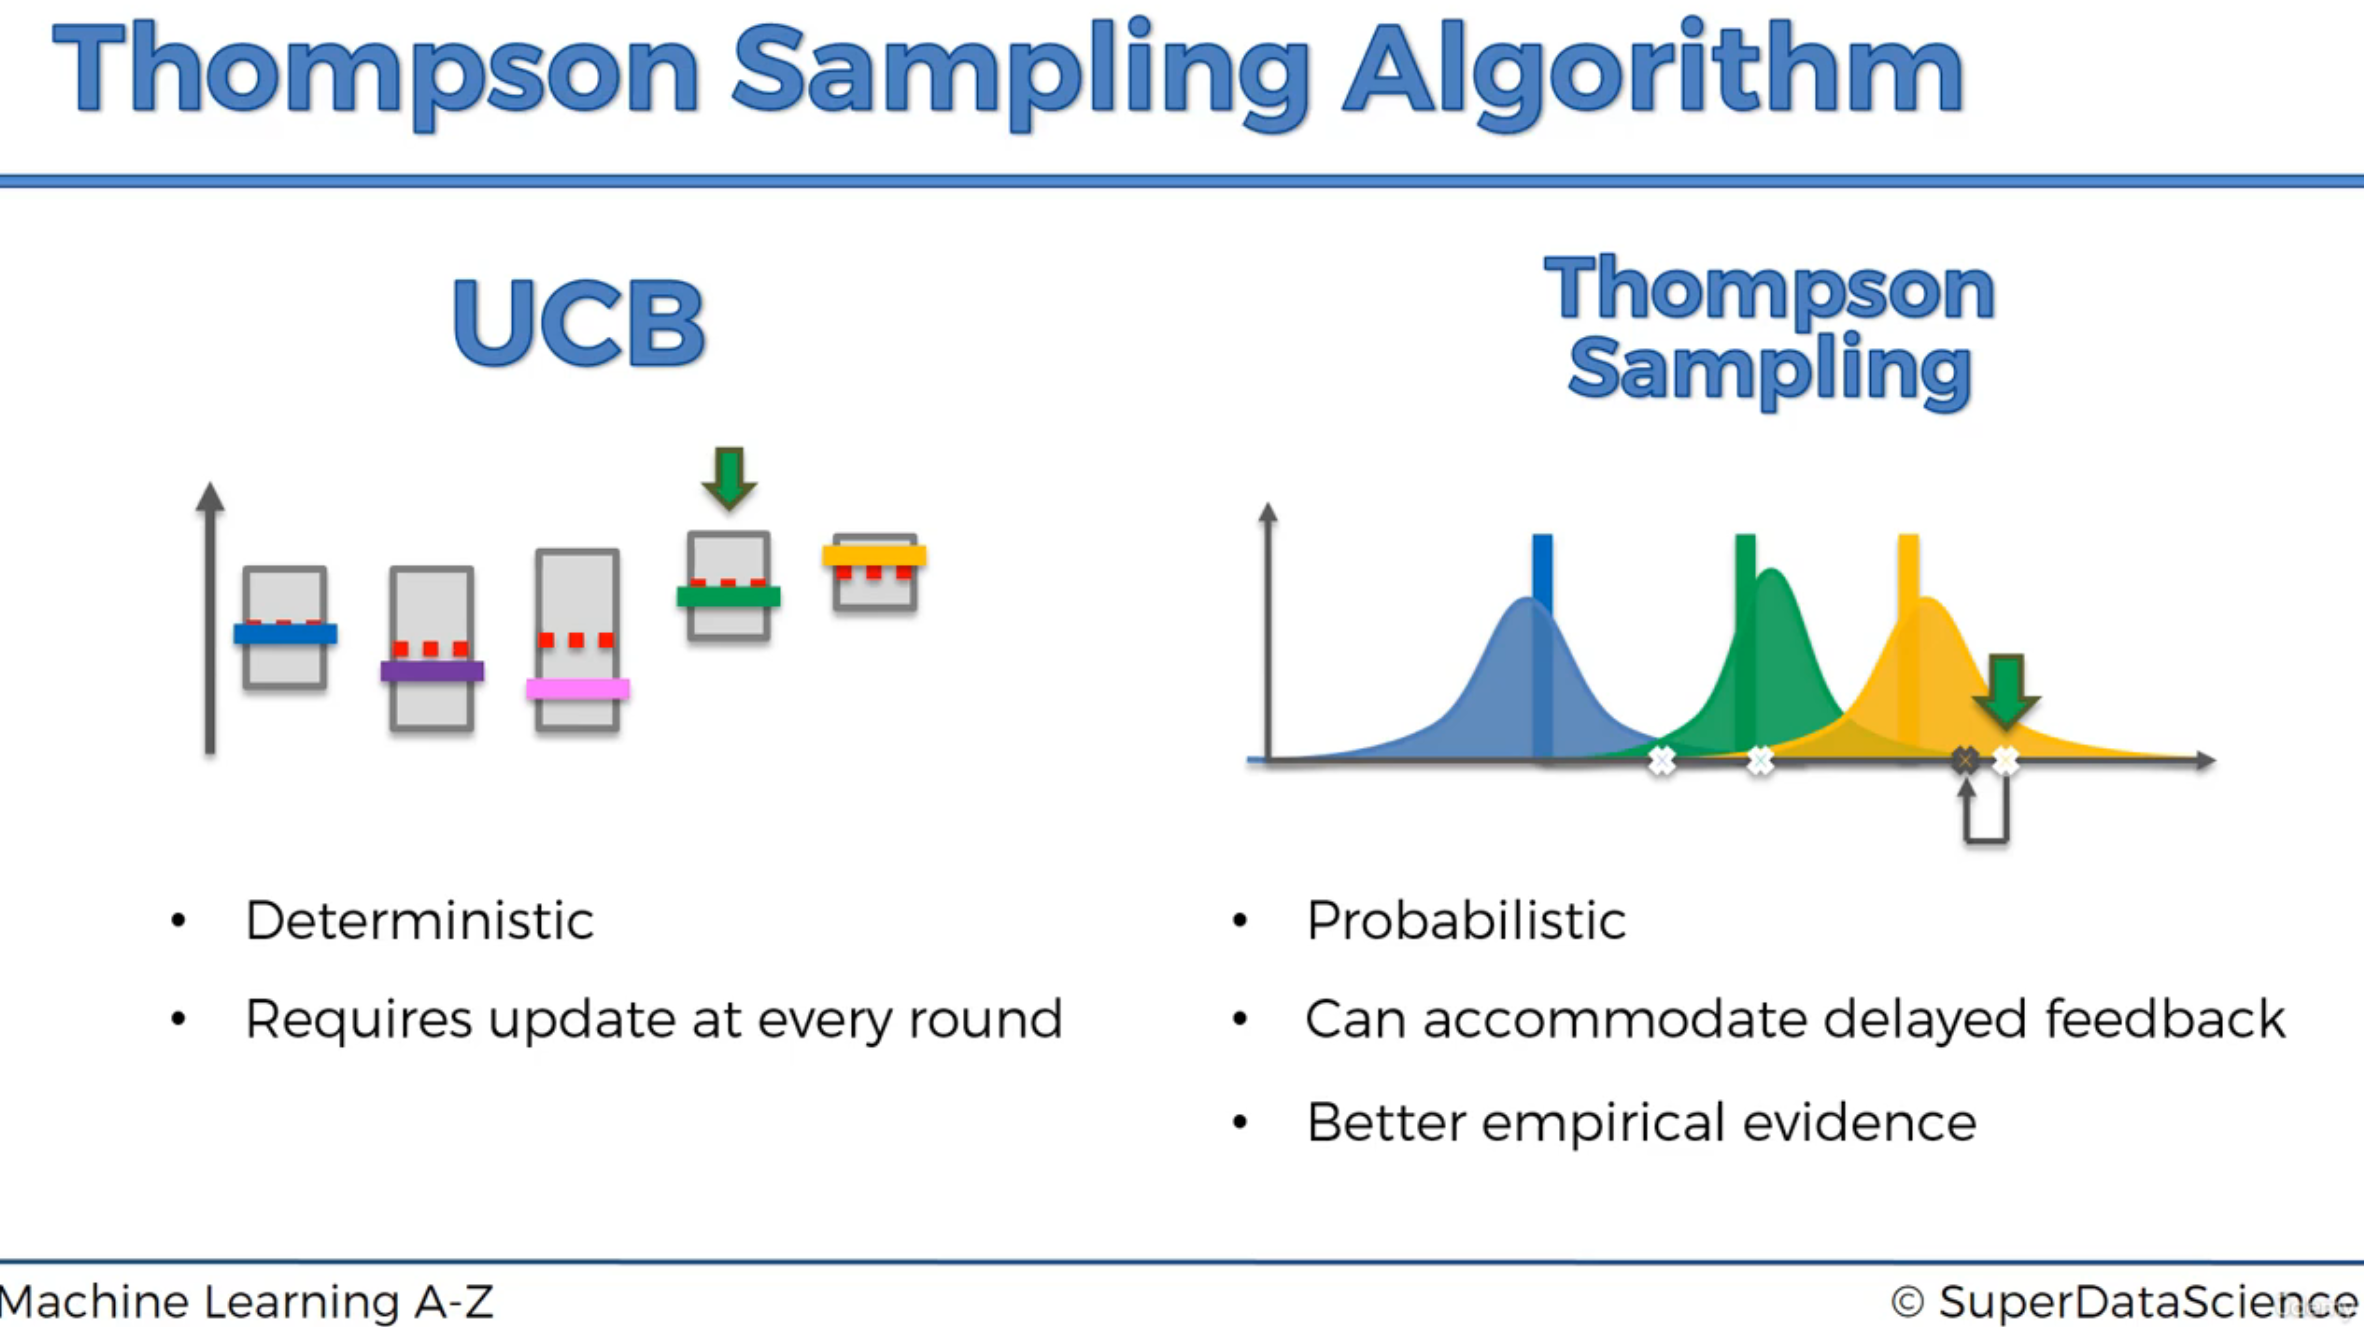

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 6 - Reinforcement Learning/2 Thompson Sampling/Ads_CTR_Optimisation.csv')

The dataset is the same as the one used in the UCB algorithm. Refer to the UCB Notebook for a description of the dataset.

## Implementing Thompson Sampling

In [4]:
import random

# Define the number of rounds (users, N) and the number of different ads (options, d)
N = 10000
d = 10

# Variables to store results
ads_selected = []  # List to store which ad was selected in each round
numbers_of_rewards_1 = [0] * d  # Number of times ad i received a reward of 1 (success)
numbers_of_rewards_0 = [0] * d  # Number of times ad i received a reward of 0 (failure)
total_reward = 0  # Total accumulated reward over all rounds

# Loop over all rounds (or users)
for n in range(0, N):
  ad = 0  # Initialize the selected ad for this round
  max_random = 0  # Initialize the maximum beta sample for this round

  # Loop over all ads to select the best one based on the beta distribution
  for i in range(0, d):
    # Draw a random sample from the beta distribution for each ad i
    # based on the current numbers of 1s (successes) and 0s (failures)
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

    # Update if the current beta sample is the largest seen so far
    if (random_beta > max_random):
      max_random = random_beta # Set the new maximum beta sample
      ad = i # Select the current ad i as the best ad

  # Append the selected ad to the list of selected ads
  ads_selected.append(ad)

  # Get the reward from the dataset for showing the selected ad to the user
  reward = dataset.values[n, ad]

  # Update the number of rewards based on the received reward (1 for success, 0 for failure)
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  # Add the reward to the total reward
  total_reward = total_reward + reward

## Visualising the results - Histogram

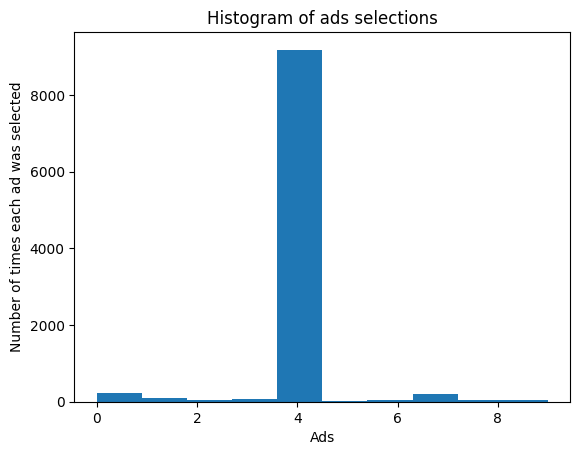

In [5]:
# Create a histogram of the ads selected by users
plt.hist(ads_selected)  # Plot a histogram of the ads selected

plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

We see that the Thompson Sampling result is much more evident than that of UCB: there is a greater difference between ad number 5 and the others.

While UCB successfully identifies the top ad in 10,000, 5,000, and 1,000 rounds, it fails at 500 rounds by selecting a suboptimal ad. Let's try now if Thompson Sampling effectively identifies at 500 rounds by executing the same code twice:

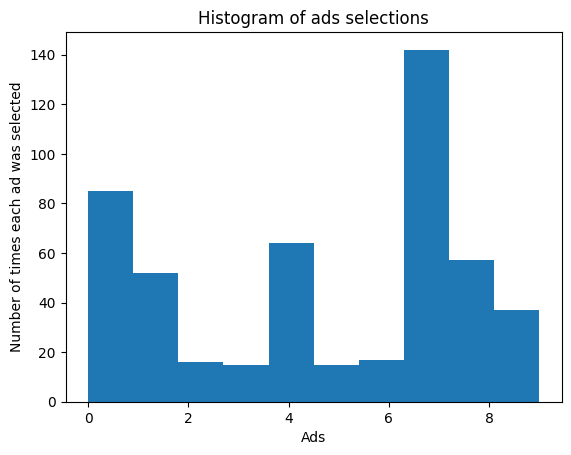

In [10]:
import random

N = 500  # Testing with 500 rounds
d = 10

ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
  ad = 0
  max_random = 0

  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

    if (random_beta > max_random):
      max_random = random_beta
      ad = i

  ads_selected.append(ad)
  reward = dataset.values[n, ad]

  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  total_reward = total_reward + reward


plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

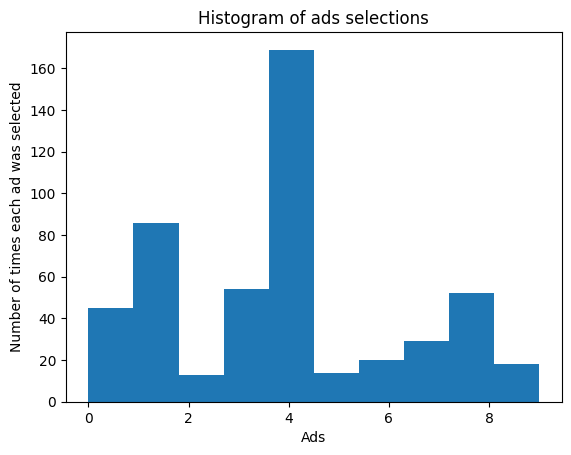

In [8]:
import random

N = 500  # Testing with 500 rounds
d = 10

ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
  ad = 0
  max_random = 0

  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

    if (random_beta > max_random):
      max_random = random_beta
      ad = i

  ads_selected.append(ad)
  reward = dataset.values[n, ad]

  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  total_reward = total_reward + reward


plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

We see that in the first run, the optimal solution is 7 and in the second run it is 5.

Thompson Sampling's performance can vary significantly across executions due to its reliance on randomness for sampling, parameter settings, data characteristics, implementation details, and its exploration-exploitation balance, necessitating careful management of these factors to achieve consistent identification of optimal solutions.

However, overall, Thompson Sampling effectively identifies the best ad, outperforming UCB. Concluding that Thompson Sampling is more efficient and reliable.

Further explanation can be found in: [AI Crash Course - by Hadelin de Ponteves](https://www.amazon.com/Crash-Course-hands-introduction-reinforcement/dp/1838645357/ref=sr_1_1?crid=235YAFPX03J0Z&dchild=1&keywords=ai+crash+course&qid=1594476675&sprefix=ai+cr%2Caps%2C213&sr=8-1).